# 1. MNIST Exploratory Data Analysis

In this notebook we are going to analyse the MNIST dataset and extract a subsample of 500 examples to perform our predictive task.

## 1.1 Loading the data

The data is stored on `data` folder of the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
/home/miguel/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
train_num_samples, n_rows, _ = x_train.shape
test_num_samples, _, _ = x_test.shape

In [5]:
x_train = x_train.reshape(train_num_samples, -1)
x_test = x_test.reshape(test_num_samples, -1)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
y_train[0]

5

#### Normalise

In [9]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Convert to DataFrame

In [10]:
train_df = pd.DataFrame(data=np.column_stack((x_train, y_train)),
                     columns=[f'pixel_{i}' for i in range(x_train.shape[1])] + ['target'])

In [11]:
test_df = pd.DataFrame(data=np.column_stack((x_test, y_test)),
                     columns=[f'pixel_{i}' for i in range(x_test.shape[1])] + ['target'])

In [12]:
test_df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'target'],
      dtype='object', length=785)

### 1.1.1 Checking class distribution

#### 1.1.1.1 Train set

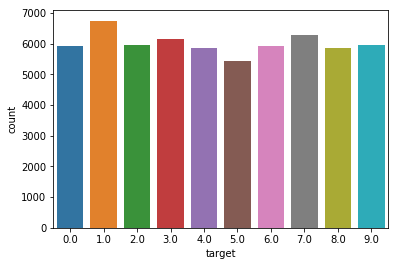

In [13]:
g = sns.countplot(train_df["target"])

In [14]:
train_df["target"].value_counts(normalize=True).sort_index()

0.0    0.098717
1.0    0.112367
2.0    0.099300
3.0    0.102183
4.0    0.097367
5.0    0.090350
6.0    0.098633
7.0    0.104417
8.0    0.097517
9.0    0.099150
Name: target, dtype: float64

In [15]:
print(f'Total number of sample in the train set: {len(y_train)}')

Total number of sample in the train set: 60000


#### 1.1.1.2 Test set

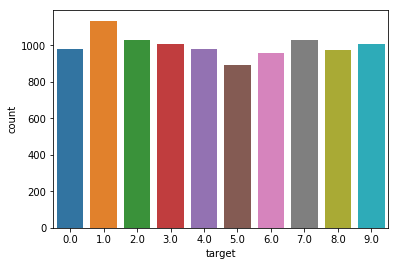

In [16]:
g = sns.countplot(test_df["target"])

In [17]:
test_df["target"].value_counts(normalize=True).sort_index()

0.0    0.0980
1.0    0.1135
2.0    0.1032
3.0    0.1010
4.0    0.0982
5.0    0.0892
6.0    0.0958
7.0    0.1028
8.0    0.0974
9.0    0.1009
Name: target, dtype: float64

In [18]:
print(f'Total number of sample in the test set: {len(y_test)}')

Total number of sample in the test set: 10000


## 1.2 Extracting a subsample

In [19]:
total_samples = 500

In [20]:
all_df = pd.concat([train_df, test_df])

In [21]:
assert all_df.shape[0] == train_df.shape[0] + test_df.shape[0]

In [22]:
sample_df = all_df.sample(total_samples, random_state=42)

In [23]:
sample_df.shape

(500, 785)

## 1.3 Checking if the sample has approximately same class distributions

In [24]:
sample_df['target'].value_counts(normalize=True).sort_index()

0.0    0.106
1.0    0.112
2.0    0.092
3.0    0.120
4.0    0.086
5.0    0.090
6.0    0.098
7.0    0.098
8.0    0.098
9.0    0.100
Name: target, dtype: float64

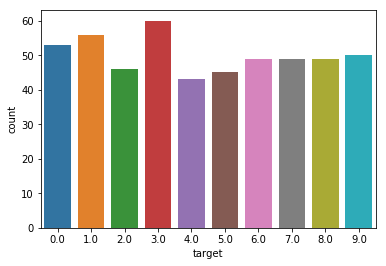

In [25]:
sns.countplot(sample_df["target"])

In [26]:
all_df['target'].value_counts(normalize=True).sort_index()

0.0    0.098614
1.0    0.112529
2.0    0.099857
3.0    0.102014
4.0    0.097486
5.0    0.090186
6.0    0.098229
7.0    0.104186
8.0    0.097500
9.0    0.099400
Name: target, dtype: float64

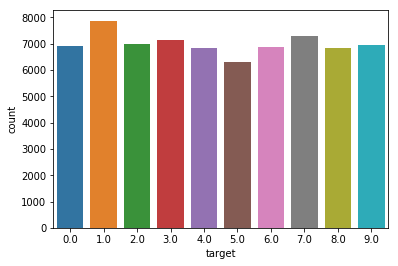

In [27]:
sns.countplot(all_df["target"])

## 1.4 Save the dataset

In [28]:
BASE_DIR = '..'
DATA_DIR = f'{BASE_DIR}/data'

In [29]:
sample_df.to_csv(f'{DATA_DIR}/sample.csv', index=False)